# Check the Sigma

## Import the data and libraries

In [1]:
import os
cwd = os.getcwd()
print(cwd)

chdir=os.chdir("D:\Folder D/New folder/WERK Student/")
print(chdir)

C:\Users\alihi
None


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import csv

In [3]:
data1=pd.read_csv('FoodMart-Transactions-1997.csv', header=0)
data2=pd.read_csv('FoodMart-Transactions-1998.csv',header=0)

## Expolartry Data Analysis

In [4]:
data=pd.concat([data1,data2],ignore_index=True)

In [5]:
print(data.info())
data= data.drop(['stock_date'],axis=1)
#print(data.set_index('transaction_date'))
#data.reset_index(inplace=True)
#data['transaction_date'] = pd.to_datetime(data['transaction_date'])
#data = data.set_index('transaction_date')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269720 entries, 0 to 269719
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   transaction_date  269720 non-null  object
 1   stock_date        269720 non-null  object
 2   product_id        269720 non-null  int64 
 3   customer_id       269720 non-null  int64 
 4   store_id          269720 non-null  int64 
 5   quantity          269720 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 12.3+ MB
None


In [6]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269720 entries, 0 to 269719
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   transaction_date  269720 non-null  object
 1   product_id        269720 non-null  int64 
 2   customer_id       269720 non-null  int64 
 3   store_id          269720 non-null  int64 
 4   quantity          269720 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 10.3+ MB
None


In [7]:
print(data.head(5))

  transaction_date  product_id  customer_id  store_id  quantity
0         1/1/1997         869         3449         6         5
1         1/1/1997        1472         3449         6         3
2         1/1/1997          76         3449         6         4
3         1/1/1997         320         3449         6         3
4         1/1/1997           4         3449         6         4


In [8]:
print(data.describe)

<bound method NDFrame.describe of        transaction_date  product_id  customer_id  store_id  quantity
0              1/1/1997         869         3449         6         5
1              1/1/1997        1472         3449         6         3
2              1/1/1997          76         3449         6         4
3              1/1/1997         320         3449         6         3
4              1/1/1997           4         3449         6         4
...                 ...         ...          ...       ...       ...
269715       12/30/1998        1521         7197        11         3
269716       12/30/1998        1536         5223        10         2
269717       12/30/1998        1542         8077        10         4
269718       12/30/1998        1544         4485        10         2
269719       12/30/1998        1549         5223        10         3

[269720 rows x 5 columns]>


In [9]:
print(data['product_id'].value_counts())

382     225
502     219
426     218
1362    216
865     214
       ... 
113     132
257     129
1551    124
1        85
1559     80
Name: product_id, Length: 1559, dtype: int64


In [10]:
# The 5 products ID that will be decomposed and try to adjust the new sigma on
print('The Highest number of Ordered product is',data['product_id'].value_counts().index[0])
print('The lowest number of Ordered product is',data['product_id'].value_counts().index[-1])
print('The Middle number of Ordered product is',data['product_id'].value_counts().index[780])
print('The 25% of Ordered product is',data['product_id'].value_counts().index[1170])
print('The 75% of Ordered product is',data['product_id'].value_counts().index[390])

The Highest number of Ordered product is 382
The lowest number of Ordered product is 1559
The Middle number of Ordered product is 1319
The 25% of Ordered product is 450
The 75% of Ordered product is 88


## Split and Filter the data into the Transaction Date and Quanitiy of each product alone

### Highest Ordered Product

In [11]:
df_high=data[data.product_id==382]
print(df_high)

       transaction_date  product_id  customer_id  store_id  quantity
283            1/2/1997         382         8577        23         4
2094          1/11/1997         382         4543        13         2
2195          1/11/1997         382         8373        13         3
4657          1/20/1997         382         9170         7         4
4991          1/20/1997         382         2198        13         3
...                 ...         ...          ...       ...       ...
267056       12/24/1998         382         6394         8         4
267353       12/25/1998         382         1550        10         2
267354       12/25/1998         382         4096         3         2
267867       12/26/1998         382          354        23         4
267868       12/26/1998         382         1636        12         2

[225 rows x 5 columns]


In [12]:
# AS we can see this product had 225 times to be ordered
df_high=df_high.drop(['product_id','customer_id','store_id'],axis=1)
print(df_high.head())

     transaction_date  quantity
283          1/2/1997         4
2094        1/11/1997         2
2195        1/11/1997         3
4657        1/20/1997         4
4991        1/20/1997         3


In [13]:
df_high['transaction_date'] = pd.to_datetime(df_high['transaction_date'])
df_high = df_high.set_index('transaction_date')

### Lowest Ordered Product

In [14]:
df_low=data[data.product_id==1559]
print(df_low)

       transaction_date  product_id  customer_id  store_id  quantity
375            1/3/1997        1559         4544         7         3
5371          1/21/1997        1559         1533         3         3
7194           2/2/1997        1559         5977        15         2
7701           2/3/1997        1559         2224        16         4
9140          2/11/1997        1559          880        11         2
...                 ...         ...          ...       ...       ...
260761       12/12/1998        1559         3941         3         3
261099       12/13/1998        1559         3494         5         2
262462       12/16/1998        1559         5317        15         2
262463       12/16/1998        1559         8958        22         2
268798       12/27/1998        1559         7437        19         3

[80 rows x 5 columns]


In [15]:
# AS we can see this product had 80 times to be ordered
df_low=df_low.drop(['product_id','customer_id','store_id'],axis=1)
print(df_low.head())

     transaction_date  quantity
375          1/3/1997         3
5371        1/21/1997         3
7194         2/2/1997         2
7701         2/3/1997         4
9140        2/11/1997         2


In [16]:
df_low['transaction_date'] = pd.to_datetime(df_low['transaction_date'])
df_low = df_low.set_index('transaction_date')

### Middle Ordered Product

In [17]:
df_mid=data[data.product_id==1319]
print(df_mid)

       transaction_date  product_id  customer_id  store_id  quantity
1340           1/7/1997        1319         5329        13         4
2256          1/11/1997        1319         2548        13         4
2705          1/11/1997        1319         8138        24         4
2894          1/12/1997        1319        10022         7         3
3745          1/16/1997        1319         4069        17         2
...                 ...         ...          ...       ...       ...
265702       12/22/1998        1319         1937        24         4
267692       12/25/1998        1319         4064        24         4
267693       12/25/1998        1319         9349        10         3
267694       12/25/1998        1319         8947         3         3
269341       12/29/1998        1319         8364         4         2

[172 rows x 5 columns]


In [18]:
# AS we can see this product had 172 times to be ordered
df_mid=df_mid.drop(['product_id','customer_id','store_id'],axis=1)
print(df_mid.head())

     transaction_date  quantity
1340         1/7/1997         4
2256        1/11/1997         4
2705        1/11/1997         4
2894        1/12/1997         3
3745        1/16/1997         2


In [19]:
df_mid['transaction_date'] = pd.to_datetime(df_mid['transaction_date'])
df_mid = df_mid.set_index('transaction_date')

### 25%of the Ordered Product

In [20]:
df_per=data[data.product_id==450]
print(df_per)

       transaction_date  product_id  customer_id  store_id  quantity
3042          1/13/1997         450         4439        15         3
11373         2/17/1997         450         7975         6         5
13186         2/25/1997         450         8108        17         2
17524         3/17/1997         450         9524         3         3
18473         3/20/1997         450         4858        17         2
...                 ...         ...          ...       ...       ...
254798        12/7/1998         450         1259        12         3
254799        12/7/1998         450         1871        12         2
257170        12/9/1998         450          838         4         3
262756       12/17/1998         450         8915        12         2
267064       12/24/1998         450         6440         8         3

[163 rows x 5 columns]


In [21]:
# AS we can see this product had 163 times to be ordered
df_per=df_per.drop(['product_id','customer_id','store_id'],axis=1)
print(df_per.head())

      transaction_date  quantity
3042         1/13/1997         3
11373        2/17/1997         5
13186        2/25/1997         2
17524        3/17/1997         3
18473        3/20/1997         2


In [22]:
df_per['transaction_date'] = pd.to_datetime(df_per['transaction_date'])
df_per = df_per.set_index('transaction_date')

### 75% of the Ordered Product

In [23]:
df_ver=data[data.product_id==88]
print(df_ver)

       transaction_date  product_id  customer_id  store_id  quantity
560            1/5/1997          88         8782         7         3
2409          1/11/1997          88         3153        13         2
3788          1/16/1997          88         1874        17         3
4054          1/17/1997          88         3425        11         2
4239          1/17/1997          88         4524        24         4
...                 ...         ...          ...       ...       ...
261128       12/14/1998          88         1805         1         4
267250       12/25/1998          88         4064        24         3
268174       12/27/1998          88         7437        19         3
268803       12/28/1998          88         4030         6         3
268965       12/29/1998          88         4202         4         4

[184 rows x 5 columns]


In [24]:
# AS we can see this product had 184 times to be ordered
df_ver=df_ver.drop(['product_id','customer_id','store_id'],axis=1)
print(df_ver.head())

     transaction_date  quantity
560          1/5/1997         3
2409        1/11/1997         2
3788        1/16/1997         3
4054        1/17/1997         2
4239        1/17/1997         4


In [25]:
df_ver['transaction_date'] = pd.to_datetime(df_ver['transaction_date'])
df_ver = df_ver.set_index('transaction_date')

## Decompose the Data on the Selected Products

### Highest product

In [26]:
s_high=sm.tsa.seasonal_decompose(df_high,freq=24,model='multiplicative',extrapolate_trend='freq')

<ipython-input-26-23fc4b5df5c9>:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  s_high=sm.tsa.seasonal_decompose(df_high,freq=24,model='multiplicative',extrapolate_trend='freq')


<Figure size 576x2160 with 0 Axes>

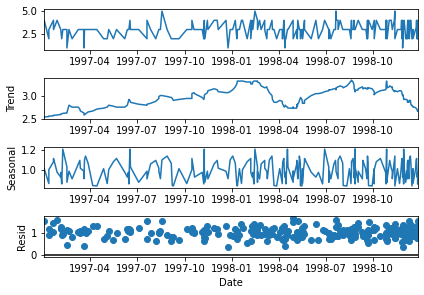

In [27]:
# Plot decomposition
fig = plt.figure()
s_high.plot()
plt.xlabel('Date')
fig.set_figheight(30)
fig.set_figwidth(8)
plt.show()

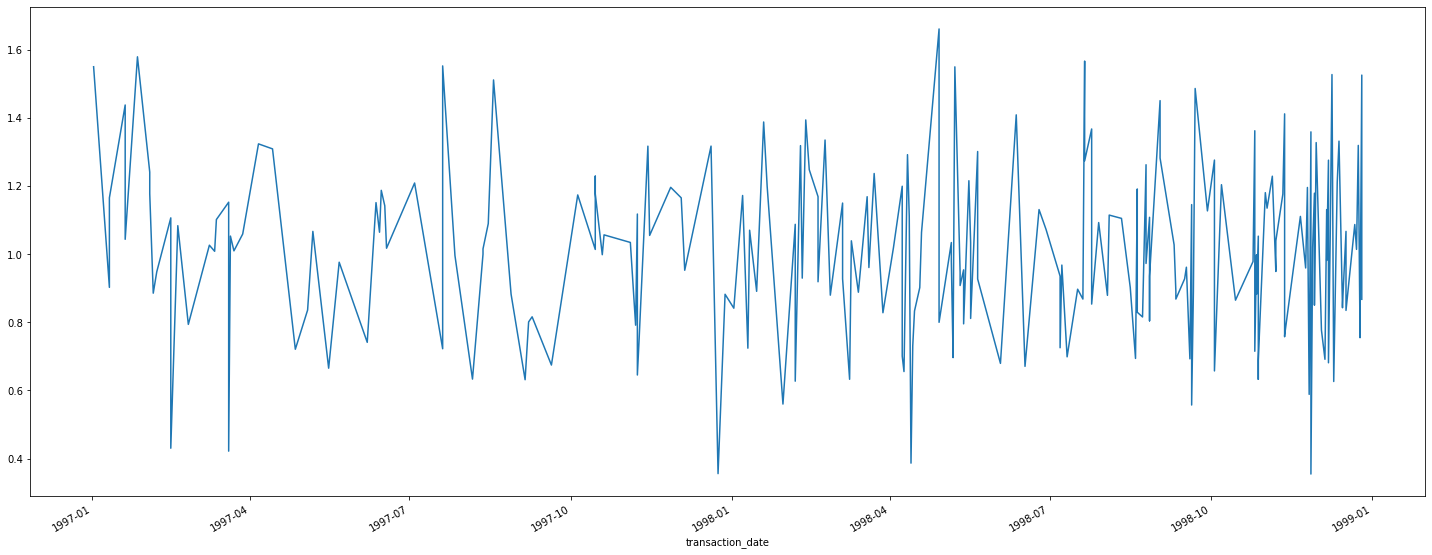

In [28]:
# Plot the residual alone
plt.figure(figsize=(25,10))
s_high.resid.plot()
plt.show()

#### Calculate the SD of the Error and the Factor of the Seasonality and add the Trend =1.1

In [29]:
print('the Standarad Deviation of the Demand data is', np.std(s_high.observed))
print('the Standarad Deviation of the Error of the decomposed data is', np.std(s_high.resid))
print('the Standarad Deviation of the Seasonal of the decomposed data is', np.std(s_high.seasonal))
print('the Standarad Deviation of the Trend of the decomposed data is', np.std(s_high.trend))
print('the  Combined Standarad Deviation of the decomposed data is', 
      np.std(s_high.resid)+np.std(s_high.seasonal)+np.std(s_high.trend))
# Ways to Get the SD along with the variance
SD= np.sqrt(np.var(s_high.resid))
print(np.sqrt(np.std(s_high.resid)**2))
print(SD)

#Ways to get the variance along with the SD
print(np.std(s_high.resid)**2)
print(np.var(s_high.resid))

the Standarad Deviation of the Demand data is 0.8055363982396381
the Standarad Deviation of the Error of the decomposed data is 0.2516470381751879
the Standarad Deviation of the Seasonal of the decomposed data is 0.09730563157790857
the Standarad Deviation of the Trend of the decomposed data is 0.20854699726070736
the  Combined Standarad Deviation of the decomposed data is 0.5574996670138038
0.2516470381751879
0.2516470381751879
0.06332623182234448
0.0633262318223445


In [30]:
# Calculate the combined SD of the three ( Error, Season, Trend), 
# Using this website: https://www.emathzone.com/tutorials/basic-statistics/combined-variance.html
n1_high=225
n2_high=225
n3_high=225
com_count_high=n1_high+n2_high+n3_high
print('The Combined Untis are',com_count_high)
x1_high= np.mean(s_high.seasonal)
print('The mean of the Seasonal is',x1_high)
x2_high=np.mean(s_high.resid)
print('The mean of the Residuals is',x2_high)
x3_high= np.mean(s_high.trend)
print('The mean of the Trend is',x3_high)
s1_high=np.std(s_high.seasonal)**2
print('The Variance of the Seasonal is',s1_high)
s2_high=np.std(s_high.resid)**2
print('The Variance of the Residuals is',s2_high)
s3_high=np.std(s_high.trend)**2
print('The Variance of the Trend is',s3_high)
com_mean_high=(n1_high*x1_high+n2_high*x2_high+n3_high*x3_high)/(n1_high+n2_high+n3_high)
print('The compound mean is',com_mean_high)
result1_high=n1_high*(s1_high+(x1_high-com_mean_high)**2)
print('The Deviation of the Seasonal is',result1_high)
result2_high=n2_high*(s2_high+(x2_high-com_mean_high)**2)
print('The Deviation of the Residual is',result2_high)
result3_high=n3_high*(s3_high+(x3_high-com_mean_high)**2)
print('The Deviation of the Trend is',result3_high)
new_sd_high= (result1_high+result2_high+result3_high)/com_count_high
print('The SD of after Calculating it Manually is',new_sd_high)

The Combined Untis are 675
The mean of the Seasonal is 0.999378193471526
The mean of the Residuals is 1.0088907326413992
The mean of the Trend is 2.9771144122383246
The Variance of the Seasonal is 0.009468385936775677
The Variance of the Residuals is 0.06332623182234448
The Variance of the Trend is 0.043491850066457484
The compound mean is 1.661794446117083
The Deviation of the Seasonal is 100.85932748379558
The Deviation of the Residual is 110.16213545085354
The Deviation of the Trend is 399.0506542523193
The SD of after Calculating it Manually is 0.9038105439806939


In [31]:
# Example
n1=50
n2=40
com_count=n1+n2
print(com_count)
x1=63
x2=54
s1=81
s2=36
com_mean=(n1*x1+n2*x2)/(n1+n2)
print(com_mean)
result1=n1*(s1+(x1-com_mean)**2)
print(result1)
result2=n2*(s2+(x2-com_mean)**2)
print(result2)
new_sd= (result1+result2)/com_count
print(new_sd)

90
59.0
4850.0
2440.0
81.0


In [32]:
# the Standard Deviation of the combined decomposed data is not equal to the SD of the Demand, I believe
# because of the NaN data on the Error and the Trend
print('The mean of the demand is',np.mean(df_high))
print('The highest demand of is',df_high.max())
Seas_high= df_high.max()/np.mean(df_high)
print('The Seasonal Fraction is',Seas_high)
# the trend(Growth rate is 1.1)
print('The new Standard Deviation is',np.std(s_high.resid)*Seas_high*1.1)
# The new Standard Deviation is less than the SD of the Demand , and the Combined Standard Deviations

The mean of the demand is quantity    3.0
dtype: float64
The highest demand of is quantity    5
dtype: int64
The Seasonal Fraction is quantity    1.666667
dtype: float64
The new Standard Deviation is quantity    0.461353
dtype: float64


#### Get the Seasonal, Trend, Error Data for the Highest one

##### Seasonal

In [33]:
# The seasonal data
print(s_high.seasonal)

transaction_date
1997-01-02    1.016860
1997-01-11    0.870308
1997-01-11    1.007586
1997-01-20    1.085262
1997-01-20    1.117675
                ...   
1998-12-24    1.117675
1998-12-25    0.981470
1998-12-25    0.933705
1998-12-26    0.980684
1998-12-26    0.866543
Name: seasonal, Length: 225, dtype: float64


In [34]:
# Convert the Seasonal data into Dataframe
s_high.seasonal
print(len(s_high.seasonal))
sea_high=pd.DataFrame(s_high.seasonal)
print(sea_high)

225
                  seasonal
transaction_date          
1997-01-02        1.016860
1997-01-11        0.870308
1997-01-11        1.007586
1997-01-20        1.085262
1997-01-20        1.117675
...                    ...
1998-12-24        1.117675
1998-12-25        0.981470
1998-12-25        0.933705
1998-12-26        0.980684
1998-12-26        0.866543

[225 rows x 1 columns]


##### Residuals

In [35]:
# Convert the residual data into Dataframe
print(len(s_high.resid))
res_high=np.array(s_high.resid)
print(res_high)
res_high=pd.DataFrame(res_high,columns=['Error'])
print(res_high)

225
[1.54964017 0.90223828 1.16503817 1.43736769 1.04326552 1.57878607
 1.24053277 1.1771986  0.88524428 0.94781206 1.10616074 0.43028329
 1.08324305 0.79366778 1.02594776 1.00814277 1.10127235 1.15216242
 0.42168403 1.05273976 1.00939255 1.05878813 1.32328777 1.30861264
 0.72067354 0.83565017 1.06653663 0.66509698 0.97605233 0.74100328
 1.15092755 1.06403077 1.186982   1.14154612 1.01711439 1.20846552
 0.72216204 1.55206144 0.99577282 0.63313314 0.9997366  1.01519206
 1.08935042 1.51087651 0.88233614 0.63129621 0.80085501 0.81592155
 0.67434453 1.17346619 1.013588   1.22858193 1.17661103 0.99808605
 1.05633077 1.03405807 0.79132133 1.11742895 0.64511422 0.75008205
 1.31659473 1.05467263 1.19580666 1.16496498 0.95245176 1.31675705
 0.35570626 0.88202521 0.84116045 1.1718178  0.72384972 1.06993486
 0.89064372 1.38749461 1.19845625 0.55986012 1.08724817 0.62700277
 1.31815634 0.92934333 1.39352184 1.24744427 1.16850878 1.02605563
 0.91869981 1.33457513 0.87938379 1.1496365  0.92738724 0.

In [36]:
# There is 24 not available data for the residuals
print(res_high.info())
print(type(res_high))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Error   225 non-null    float64
dtypes: float64(1)
memory usage: 1.9 KB
None
<class 'pandas.core.frame.DataFrame'>


##### Trend

In [37]:
# Convert the Trend data into Dataframe
print(len(s_high.trend))
tre_high=np.array(s_high.trend)
print(tre_high)
tre_high=pd.DataFrame(tre_high,columns=['Trend'])
print(tre_high)

225
[2.53844505 2.54704106 2.55563708 2.56423309 2.57282911 2.58142512
 2.59002114 2.59861715 2.60721316 2.61580918 2.62440519 2.63300121
 2.79166667 2.75       2.75       2.70833333 2.66666667 2.625
 2.58333333 2.58333333 2.60416667 2.64583333 2.66666667 2.70833333
 2.72916667 2.75       2.79166667 2.77083333 2.75       2.75
 2.79166667 2.875      2.91666667 2.89583333 2.85416667 2.8125
 2.79166667 2.8125     2.83333333 2.875      2.9375     2.97916667
 3.         3.         2.97916667 2.95833333 2.9375     2.89583333
 2.91666667 2.9375     2.9375     3.         3.04166667 3.0625
 3.04166667 2.95833333 2.91666667 2.95833333 3.         3.02083333
 3.0625     3.10416667 3.14583333 3.125      3.08333333 3.0625
 3.0625     3.08333333 3.125      3.1875     3.25       3.3125
 3.3125     3.3125     3.3125     3.29166667 3.29166667 3.25
 3.25       3.29166667 3.3125     3.3125     3.3125     3.3125
 3.29166667 3.27083333 3.20833333 3.16666667 3.16666667 3.1875
 3.14583333 3.0625     3.       

In [38]:
# There is 24 not available data for the residuals
print(tre_high.info())
print(type(tre_high))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Trend   225 non-null    float64
dtypes: float64(1)
memory usage: 1.9 KB
None
<class 'pandas.core.frame.DataFrame'>


#### Combine all DataFrames and download it as CSV

In [39]:
csv_high= pd.concat([sea_high,df_high],axis=1)
print(csv_high)

                  seasonal  quantity
transaction_date                    
1997-01-02        1.016860         4
1997-01-11        0.870308         2
1997-01-11        1.007586         3
1997-01-20        1.085262         4
1997-01-20        1.117675         3
...                    ...       ...
1998-12-24        1.117675         4
1998-12-25        0.981470         2
1998-12-25        0.933705         2
1998-12-26        0.980684         4
1998-12-26        0.866543         2

[225 rows x 2 columns]


In [40]:
csv_high=csv_high.reset_index()
print(csv_high)
new_csv_high= pd.concat([csv_high,res_high,tre_high],axis=1)
print(new_csv_high.iloc[50:70,])

    transaction_date  seasonal  quantity
0         1997-01-02  1.016860         4
1         1997-01-11  0.870308         2
2         1997-01-11  1.007586         3
3         1997-01-20  1.085262         4
4         1997-01-20  1.117675         3
..               ...       ...       ...
220       1998-12-24  1.117675         4
221       1998-12-25  0.981470         2
222       1998-12-25  0.933705         2
223       1998-12-26  0.980684         4
224       1998-12-26  0.866543         2

[225 rows x 3 columns]
   transaction_date  seasonal  quantity     Error     Trend
50       1997-10-15  1.007586         3  1.013588  2.937500
51       1997-10-15  1.085262         4  1.228582  3.000000
52       1997-10-15  1.117675         4  1.176611  3.041667
53       1997-10-19  0.981470         3  0.998086  3.062500
54       1997-10-20  0.933705         3  1.056331  3.041667
55       1997-11-04  0.980684         3  1.034058  2.958333
56       1997-11-07  0.866543         2  0.791321  2.916667
57  

In [123]:
new_csv_high['Added_Demand']= new_csv_high['seasonal']+new_csv_high['Error']+new_csv_high['Trend']
new_csv_high['Multiplied_Demand']= new_csv_high['seasonal']*new_csv_high['Error']*new_csv_high['Trend']

In [124]:
new_csv_high['quantity']=new_csv_high['quantity'].astype('str')
new_csv_high['Multiplied_Demand']= new_csv_high['Multiplied_Demand'].astype('str')
pd.set_option('display.max_rows', None)
print(new_csv_high[['quantity','Multiplied_Demand']])

    quantity   Multiplied_Demand
0        4.0                 4.0
1        2.0  1.9999999999999996
2        3.0  2.9999999999999996
3        4.0                 4.0
4        3.0  3.0000000000000004
5        4.0                 4.0
6        3.0                 3.0
7        3.0                 3.0
8        2.0                 2.0
9        3.0                 3.0
10       3.0                 3.0
11       1.0  1.0000000000000002
12       3.0  3.0000000000000004
13       2.0                 2.0
14       3.0                 3.0
15       3.0  3.0000000000000004
16       3.0  3.0000000000000004
17       3.0                 3.0
18       1.0                 1.0
19       3.0  2.9999999999999996
20       3.0  2.9999999999999996
21       3.0  2.9999999999999996
22       3.0                 3.0
23       3.0                 3.0
24       2.0  1.9999999999999998
25       2.0  1.9999999999999998
26       3.0                 3.0
27       2.0                 2.0
28       3.0                 3.0
29       2

In [44]:
# Save the Data into CSV
new_csv_high.to_csv(r'/csv_High_product.csv')

### Lowest product

In [45]:
s_low=sm.tsa.seasonal_decompose(df_low.quantity,freq=24, model='multiplicative',extrapolate_trend='freq')

<ipython-input-45-e5c032d0aff3>:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  s_low=sm.tsa.seasonal_decompose(df_low.quantity,freq=24, model='multiplicative',extrapolate_trend='freq')


<Figure size 576x2160 with 0 Axes>

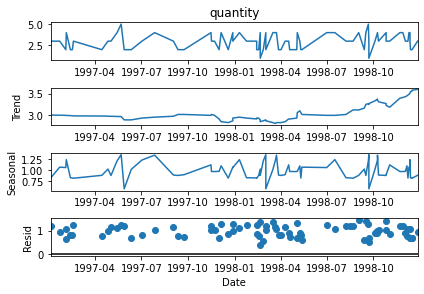

In [46]:
# Plot decomposition
fig = plt.figure()
s_low.plot()
plt.xlabel('Date')
fig.set_figheight(30)
fig.set_figwidth(8)
plt.show()

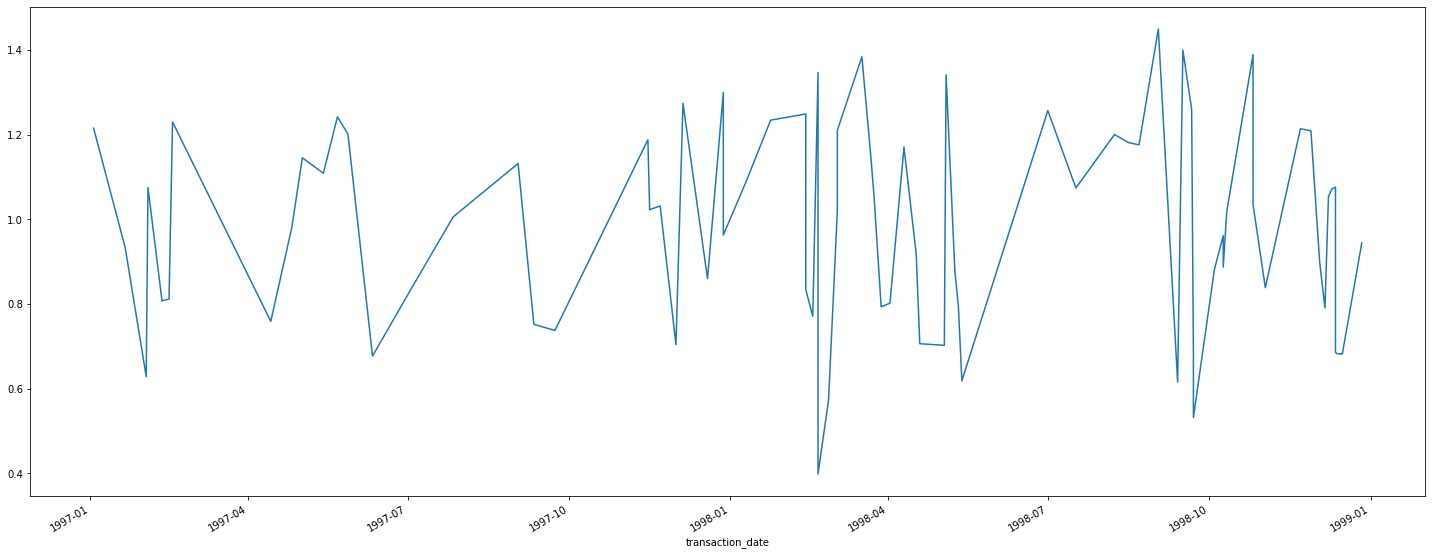

In [47]:
# Plot the residual alone
plt.figure(figsize=(25,10))
s_low.resid.plot()
plt.show()

#### Calculate the SD of the Error and the Factor of the Seasonality and add the Trend =1.1

In [48]:
print('the Standarad Deviation of the Demand data is', np.std(s_low.observed))
print('the Standarad Deviation of the Error of the decomposed data is', np.std(s_low.resid))
print('the Standarad Deviation of the Seasonal of the decomposed data is', np.std(s_low.seasonal))
print('the Standarad Deviation of the Trend of the decomposed data is', np.std(s_low.trend))
#print('the  Combined Standarad Deviation of the decomposed data is', 
 #     np.std(s_low.resid)+np.std(s_low.seasonal)+np.std(s_low.trend))

the Standarad Deviation of the Demand data is 0.8944271909999159
the Standarad Deviation of the Error of the decomposed data is 0.24006818090956647
the Standarad Deviation of the Seasonal of the decomposed data is 0.18169374852630701
the Standarad Deviation of the Trend of the decomposed data is 0.21850362962206782


In [49]:
# Calculate the combined SD of the three ( Error, Season, Trend), 
# Using this website: https://www.emathzone.com/tutorials/basic-statistics/combined-variance.html
n1_low=80
n2_low=80
n3_low=80
com_count_low=n1_low+n2_low+n3_low
print('The Combined Untis are',com_count_low)
x1_low= np.mean(s_low.seasonal)
print('The mean of the Seasonal is',x1_low)
x2_low=np.mean(s_low.resid)
print('The mean of the Residuals is',x2_low)
x3_low= np.mean(s_low.trend)
print('The mean of the Trend is',x3_low)
s1_low=np.std(s_low.seasonal)**2
print('The Variance of the Seasonal is',s1_low)
s2_low=np.std(s_low.resid)**2
print('The Variance of the Residuals is',s2_low)
s3_low=np.std(s_low.trend)**2
print('The Variance of the Trend is',s3_low)
com_mean_low=(n1_low*x1_low+n2_low*x2_low+n3_low*x3_low)/(n1_low+n2_low+n3_low)
print('The compound mean is',com_mean_low)
result1_low=n1_low*(s1_low+(x1_low-com_mean_low)**2)
print('The Deviation of the Seasonal is',result1_low)
result2_low=n2_low*(s2_low+(x2_low-com_mean_low)**2)
print('The Deviation of the Residual is',result2_low)
result3_low=n3_low*(s3_low+(x3_low-com_mean_low)**2)
print('The Deviation of the Trend is',result3_low)
new_sd_low= (result1_low+result2_low+result3_low)/com_count_low
print('The SD of after Calculating it Manually is',new_sd_low)

The Combined Untis are 240
The mean of the Seasonal is 0.9943231970031696
The mean of the Residuals is 0.9807440266371593
The mean of the Trend is 3.0837139945652168
The Variance of the Seasonal is 0.03301261825354089
The Variance of the Residuals is 0.057632731485228336
The Variance of the Trend is 0.04774383615801779
The compound mean is 1.6862604060685153
The Deviation of the Seasonal is 40.943177563414466
The Deviation of the Residual is 44.4308874504926
The Deviation of the Trend is 160.04962945282608
The SD of after Calculating it Manually is 1.0225987269447214


In [50]:
# the Standard Deviation of the combined decomposed data is not equal to the SD of the Demand, I believe
# because of the NaN data on the Error and the Trend
print('The mean of the demand is',np.mean(df_low))
print('The highest demand of is',df_low.max())
Seas_low= df_low.max()/np.mean(df_low)
print('The Seasonal Fraction is',Seas_low)
# the trend(Growth rate is 1.1)
print('The new Standard Deviation is',np.std(s_low.resid)*Seas_low*1.1)
# The new Standard Deviation is less than the SD of the Demand , and the Combined Standard Deviations

The mean of the demand is quantity    3.0
dtype: float64
The highest demand of is quantity    5
dtype: int64
The Seasonal Fraction is quantity    1.666667
dtype: float64
The new Standard Deviation is quantity    0.440125
dtype: float64


#### Get the Seasonal, Trend, Error Data for the Highest one

##### Seasonal

In [51]:
# The seasonal data
print(s_low.seasonal)

transaction_date
1997-01-03    0.821225
1997-01-21    1.070453
1997-02-02    1.061015
1997-02-03    1.241749
1997-02-11    0.827683
1997-02-15    0.823846
1997-02-17    0.816664
1997-04-14    0.883220
1997-04-26    1.026145
1997-05-02    0.879776
1997-05-14    1.213000
1997-05-22    1.355079
1997-05-28    0.575085
1997-06-11    1.020454
1997-07-02    1.233310
1997-07-27    1.344702
1997-09-02    0.889983
1997-09-11    0.880584
1997-09-23    0.898024
1997-11-15    1.122645
1997-11-16    0.971152
1997-11-22    0.969669
1997-12-01    0.974158
1997-12-05    1.100380
1997-12-19    0.821225
1997-12-28    1.070453
1997-12-28    1.061015
1998-01-10    1.241749
1998-01-24    0.827683
1998-02-13    0.823846
1998-02-13    0.816664
1998-02-17    0.883220
1998-02-20    1.026145
1998-02-20    0.879776
1998-02-26    1.213000
1998-03-03    1.355079
1998-03-03    0.575085
1998-03-17    1.020454
1998-03-22    1.233310
1998-03-24    1.344702
1998-03-28    0.889983
1998-04-02    0.880584
1998-04-10    0.8

In [52]:
# Convert the Seasonal data into Dataframe
s_low.seasonal
print(len(s_low.seasonal))
sea_low=pd.DataFrame(s_low.seasonal)
print(sea_low)

80
                  seasonal
transaction_date          
1997-01-03        0.821225
1997-01-21        1.070453
1997-02-02        1.061015
1997-02-03        1.241749
1997-02-11        0.827683
1997-02-15        0.823846
1997-02-17        0.816664
1997-04-14        0.883220
1997-04-26        1.026145
1997-05-02        0.879776
1997-05-14        1.213000
1997-05-22        1.355079
1997-05-28        0.575085
1997-06-11        1.020454
1997-07-02        1.233310
1997-07-27        1.344702
1997-09-02        0.889983
1997-09-11        0.880584
1997-09-23        0.898024
1997-11-15        1.122645
1997-11-16        0.971152
1997-11-22        0.969669
1997-12-01        0.974158
1997-12-05        1.100380
1997-12-19        0.821225
1997-12-28        1.070453
1997-12-28        1.061015
1998-01-10        1.241749
1998-01-24        0.827683
1998-02-13        0.823846
1998-02-13        0.816664
1998-02-17        0.883220
1998-02-20        1.026145
1998-02-20        0.879776
1998-02-26        1.21300

##### Residuals

In [53]:
# Convert the residual data into Dataframe
print(len(s_low.resid))
res_low=np.array(s_low.resid)
print(res_low)
res_low=pd.DataFrame(res_low,columns=['Error'])
print(res_low)

80
[1.21486264 0.93301023 0.62821211 1.07470594 0.80704089 0.81167156
 1.22953572 0.75873908 0.98064479 1.14503106 1.10850197 1.24168769
 1.20094951 0.6768042  0.82807783 1.00551137 1.13147477 0.7518525
 0.73725055 1.1876717  1.02260399 1.03127928 0.70390455 1.27361485
 0.85954812 1.29973426 0.96254668 1.08887741 1.23389783 1.24849958
 0.83369743 0.77087392 1.34610053 0.39824341 0.57349727 1.01934649
 1.20965205 1.38346741 1.15317505 1.04987217 0.79314163 0.80160745
 1.17045252 0.91620388 0.70608371 0.70214759 1.34077057 0.87828138
 0.79522819 0.61849423 1.25665816 1.07375411 1.19985927 1.18101311
 1.17551337 1.44924296 0.61548676 1.39895761 1.26023284 0.6811979
 0.53163052 0.88196047 0.96097921 0.88684854 1.01761568 1.38877213
 1.034529   0.83835649 1.21354438 1.20880521 0.89755696 0.79033586
 1.05333716 1.07173738 1.07555916 0.68563865 0.68217812 0.68179186
 0.68422959 0.94412014]
       Error
0   1.214863
1   0.933010
2   0.628212
3   1.074706
4   0.807041
5   0.811672
6   1.229536


In [54]:
# There is 24 not available data for the residuals
print(res_low.info())
print(type(res_low))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Error   80 non-null     float64
dtypes: float64(1)
memory usage: 768.0 bytes
None
<class 'pandas.core.frame.DataFrame'>


##### Trend

In [55]:
# Convert the Trend data into Dataframe
print(len(s_low.trend))
tre_low=np.array(s_low.trend)
print(tre_low)
tre_low=pd.DataFrame(tre_low,columns=['Trend'])
print(tre_low)

80
[3.00698973 3.00377415 3.00055857 2.997343   2.99412742 2.99091184
 2.98769626 2.98448068 2.9812651  2.97804952 2.97483394 2.97161836
 2.89583333 2.89583333 2.9375     2.95833333 2.97916667 3.02083333
 3.02083333 3.         3.02083333 3.         2.91666667 2.85416667
 2.83333333 2.875      2.9375     2.95833333 2.9375     2.91666667
 2.9375     2.9375     2.89583333 2.85416667 2.875      2.89583333
 2.875      2.83333333 2.8125     2.83333333 2.83333333 2.83333333
 2.85416667 2.91666667 2.91666667 2.9375     3.0625     3.10416667
 3.0625     3.02083333 3.         3.         3.02083333 3.08333333
 3.125      3.125      3.16666667 3.25       3.27083333 3.25
 3.27083333 3.33333333 3.375      3.35416667 3.3125     3.27083333
 3.22916667 3.1875     3.39404287 3.41255737 3.43107186 3.44958635
 3.46810085 3.48661534 3.50512983 3.52364432 3.54215882 3.56067331
 3.5791878  3.59770229]
       Trend
0   3.006990
1   3.003774
2   3.000559
3   2.997343
4   2.994127
5   2.990912
6   2.987696
7   

In [56]:
# There is 24 not available data for the residuals
print(tre_low.info())
print(type(tre_low))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Trend   80 non-null     float64
dtypes: float64(1)
memory usage: 768.0 bytes
None
<class 'pandas.core.frame.DataFrame'>


#### Combine all DataFrames and download it as CSV

In [57]:
csv_low= pd.concat([sea_low,df_low],axis=1)
print(csv_low)

                  seasonal  quantity
transaction_date                    
1997-01-03        0.821225         3
1997-01-21        1.070453         3
1997-02-02        1.061015         2
1997-02-03        1.241749         4
1997-02-11        0.827683         2
1997-02-15        0.823846         2
1997-02-17        0.816664         3
1997-04-14        0.883220         2
1997-04-26        1.026145         3
1997-05-02        0.879776         3
1997-05-14        1.213000         4
1997-05-22        1.355079         5
1997-05-28        0.575085         2
1997-06-11        1.020454         2
1997-07-02        1.233310         3
1997-07-27        1.344702         4
1997-09-02        0.889983         3
1997-09-11        0.880584         2
1997-09-23        0.898024         2
1997-11-15        1.122645         4
1997-11-16        0.971152         3
1997-11-22        0.969669         3
1997-12-01        0.974158         2
1997-12-05        1.100380         4
1997-12-19        0.821225         2
1

In [58]:
csv_low=csv_low.reset_index()
print(csv_low)
new_csv_low= pd.concat([csv_low,res_low,tre_low],axis=1)
print(new_csv_low.iloc[50:70,])

   transaction_date  seasonal  quantity
0        1997-01-03  0.821225         3
1        1997-01-21  1.070453         3
2        1997-02-02  1.061015         2
3        1997-02-03  1.241749         4
4        1997-02-11  0.827683         2
5        1997-02-15  0.823846         2
6        1997-02-17  0.816664         3
7        1997-04-14  0.883220         2
8        1997-04-26  1.026145         3
9        1997-05-02  0.879776         3
10       1997-05-14  1.213000         4
11       1997-05-22  1.355079         5
12       1997-05-28  0.575085         2
13       1997-06-11  1.020454         2
14       1997-07-02  1.233310         3
15       1997-07-27  1.344702         4
16       1997-09-02  0.889983         3
17       1997-09-11  0.880584         2
18       1997-09-23  0.898024         2
19       1997-11-15  1.122645         4
20       1997-11-16  0.971152         3
21       1997-11-22  0.969669         3
22       1997-12-01  0.974158         2
23       1997-12-05  1.100380         4


In [125]:
new_csv_low['Added_Demand']= new_csv_low['seasonal']+new_csv_low['Error']+new_csv_low['Trend']
new_csv_low['Multiplied_Demand']= new_csv_low['seasonal']*new_csv_low['Error']*new_csv_low['Trend']

In [126]:
new_csv_low['quantity']=new_csv_low['quantity'].astype('str')
new_csv_low['Multiplied_Demand']= new_csv_low['Multiplied_Demand'].astype('str')
pd.set_option('display.max_rows', None)
print(new_csv_low[['quantity','Multiplied_Demand']])

   quantity   Multiplied_Demand
0       3.0                 3.0
1       3.0                 3.0
2       2.0                 2.0
3       4.0                 4.0
4       2.0                 2.0
5       2.0  1.9999999999999998
6       3.0  3.0000000000000004
7       2.0  1.9999999999999998
8       3.0                 3.0
9       3.0  2.9999999999999996
10      4.0                 4.0
11      5.0                 5.0
12      2.0                 2.0
13      2.0                 2.0
14      3.0  3.0000000000000004
15      4.0  3.9999999999999996
16      3.0                 3.0
17      2.0                 2.0
18      2.0                 2.0
19      4.0                 4.0
20      3.0  2.9999999999999996
21      3.0   3.000000000000001
22      2.0                 2.0
23      4.0   4.000000000000001
24      2.0                 2.0
25      4.0                 4.0
26      3.0                 3.0
27      4.0                 4.0
28      3.0  3.0000000000000004
29      3.0                 3.0
30      

In [62]:
# Save the Data into CSV
new_csv_low.to_csv(r'/csv_low_product.csv')

### Middle product

In [63]:
s_mid=sm.tsa.seasonal_decompose(df_mid,freq=24, model='multiplicative',extrapolate_trend='freq')

<ipython-input-63-bbc691dc6d74>:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  s_mid=sm.tsa.seasonal_decompose(df_mid,freq=24, model='multiplicative',extrapolate_trend='freq')


<Figure size 576x2160 with 0 Axes>

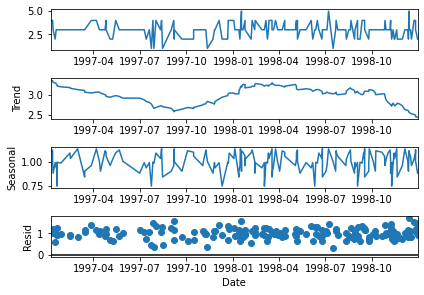

In [64]:
# Plot decomposition
fig = plt.figure()
s_mid.plot()
plt.xlabel('Date')
fig.set_figheight(30)
fig.set_figwidth(8)
plt.show()

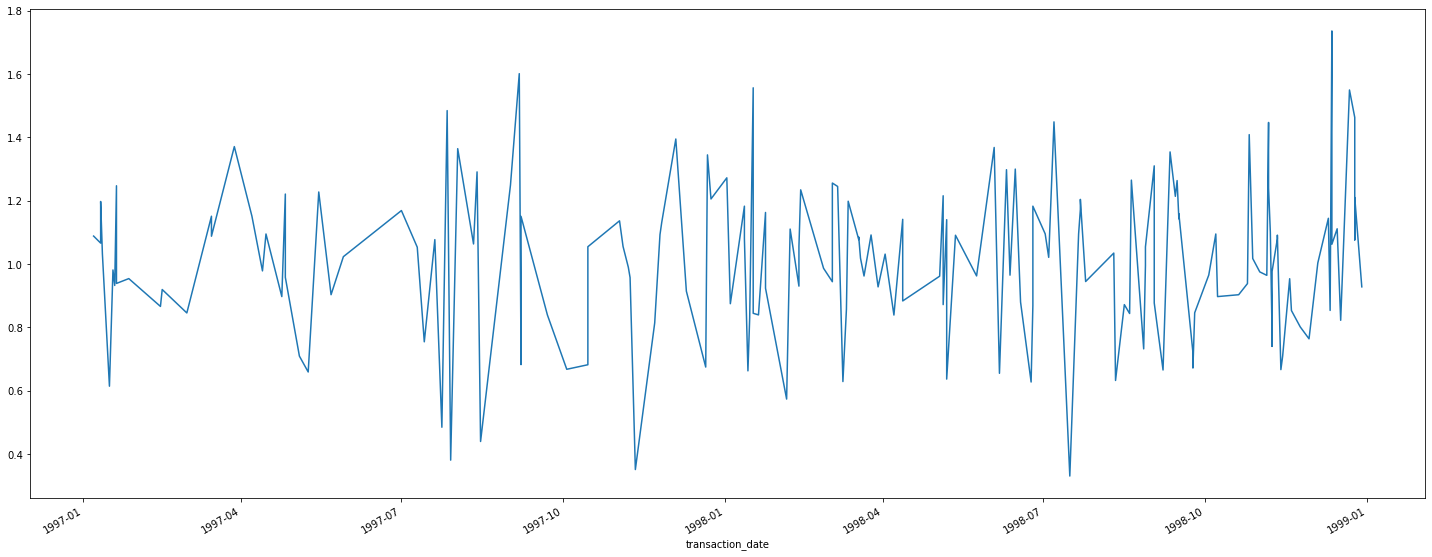

In [65]:
# Plot the residual alone
plt.figure(figsize=(25,10))
s_mid.resid.plot()
plt.show()

#### Calculate the SD of the Error and the Factor of the Seasonality and add the Trend =1.1

In [66]:
print('the Standarad Deviation of the Demand data is', np.std(s_mid.observed))
print('the Standarad Deviation of the Error of the decomposed data is', np.std(s_mid.resid))
print('the Standarad Deviation of the Seasonal of the decomposed data is', np.std(s_mid.seasonal))
print('the Standarad Deviation of the Trend of the decomposed data is', np.std(s_mid.trend))
#print('the  Combined Standarad Deviation of the decomposed data is', 
 #     np.std(s_mid.resid)+np.std(s_mid.seasonal)+np.std(s_mid.trend))

the Standarad Deviation of the Demand data is 0.7813010394360838
the Standarad Deviation of the Error of the decomposed data is 0.24326511910857843
the Standarad Deviation of the Seasonal of the decomposed data is 0.0978509480104252
the Standarad Deviation of the Trend of the decomposed data is 0.22156352272206137


In [67]:
# Calculate the combined SD of the three ( Error, Season, Trend), 
# Using this website: https://www.emathzone.com/tutorials/basic-statistics/combined-variance.html
n1_mid=172
n2_mid=172
n3_mid=172
com_count_mid=n1_mid+n2_mid+n3_mid
print('The Combined Untis are',com_count_mid)
x1_mid= np.mean(s_mid.seasonal)
print('The mean of the Seasonal is',x1_mid)
x2_mid=np.mean(s_mid.resid)
print('The mean of the Residuals is',x2_mid)
x3_mid= np.mean(s_mid.trend)
print('The mean of the Trend is',x3_mid)
s1_mid=np.std(s_mid.seasonal)**2
print('The Variance of the Seasonal is',s1_mid)
s2_mid=np.std(s_mid.resid)**2
print('The Variance of the Residuals is',s2_mid)
s3_mid=np.std(s_mid.trend)**2
print('The Variance of the Trend is',s3_mid)
com_mean_mid=(n1_mid*x1_mid+n2_mid*x2_mid+n3_mid*x3_mid)/(n1_mid+n2_mid+n3_mid)
print('The compound mean is',com_mean_mid)
result1_mid=n1_mid*(s1_mid+(x1_mid-com_mean_mid)**2)
print('The Deviation of the Seasonal is',result1_mid)
result2_mid=n2_mid*(s2_mid+(x2_mid-com_mean_mid)**2)
print('The Deviation of the Residual is',result2_mid)
result3_mid=n3_mid*(s3_mid+(x3_mid-com_mean_mid)**2)
print('The Deviation of the Trend is',result3_mid)
new_sd_mid= (result1_mid+result2_mid+result3_mid)/com_count_mid
print('The SD of after Calculating it Manually is',new_sd_mid)

The Combined Untis are 516
The mean of the Seasonal is 1.000594412923328
The mean of the Residuals is 1.0075153788201991
The mean of the Trend is 2.985339252612066
The Variance of the Seasonal is 0.009574808026538935
The Variance of the Residuals is 0.059177918174910846
The Variance of the Trend is 0.049090394601009404
The compound mean is 1.6644830147851977
The Deviation of the Seasonal is 77.4555359978873
The Deviation of the Residual is 84.41491557542015
The Deviation of the Trend is 308.52527444443126
The SD of after Calculating it Manually is 0.9116196240653851


In [68]:
# the Standard Deviation of the combined decomposed data is not equal to the SD of the Demand
print('The mean of the demand is',np.mean(df_mid))
print('The highest demand of is',df_mid.max())
Seas_mid= df_mid.max()/np.mean(df_mid)
print('The Seasonal Fraction is',Seas_mid)
# the trend(Growth rate is 1.1)
print('The new Standard Deviation is',np.std(s_mid.resid)*Seas_mid*1.1)
# The new Standard Deviation is less than the SD of the Demand , and the Combined Standard Deviations

The mean of the demand is quantity    3.005814
dtype: float64
The highest demand of is quantity    5
dtype: int64
The Seasonal Fraction is quantity    1.663443
dtype: float64
The new Standard Deviation is quantity    0.445123
dtype: float64


#### Get the Seasonal, Trend, Error Data for the Highest one

##### Seasonal

In [69]:
# The seasonal data
print(s_mid.seasonal)

transaction_date
1997-01-07    1.093938
1997-01-11    1.122909
1997-01-11    1.005300
1997-01-12    0.880092
1997-01-16    0.990925
1997-01-18    0.935752
1997-01-19    0.990438
1997-01-20    0.744727
1997-01-20    0.995049
1997-01-27    0.984871
1997-02-14    1.091066
1997-02-15    1.033817
1997-03-01    1.135465
1997-03-15    0.839784
1997-03-15    0.900591
1997-03-28    0.959449
1997-04-07    1.134700
1997-04-13    1.001395
1997-04-15    0.900931
1997-04-24    1.114671
1997-04-26    1.099790
1997-04-26    1.058551
1997-05-04    0.960016
1997-05-09    1.025774
1997-05-15    1.093938
1997-05-22    1.122909
1997-05-29    1.005300
1997-07-01    0.880092
1997-07-10    0.990925
1997-07-14    0.935752
1997-07-20    0.990438
1997-07-24    0.744727
1997-07-27    0.995049
1997-07-29    0.984871
1997-08-02    1.091066
1997-08-11    1.033817
1997-08-13    1.135465
1997-08-15    0.839784
1997-09-01    0.900591
1997-09-06    0.959449
1997-09-07    1.134700
1997-09-07    1.001395
1997-09-22    0.9

In [70]:
# Convert the Seasonal data into Dataframe
s_mid.seasonal
print(len(s_mid.seasonal))
sea_mid=pd.DataFrame(s_mid.seasonal)
print(sea_mid)

172
                  seasonal
transaction_date          
1997-01-07        1.093938
1997-01-11        1.122909
1997-01-11        1.005300
1997-01-12        0.880092
1997-01-16        0.990925
1997-01-18        0.935752
1997-01-19        0.990438
1997-01-20        0.744727
1997-01-20        0.995049
1997-01-27        0.984871
1997-02-14        1.091066
1997-02-15        1.033817
1997-03-01        1.135465
1997-03-15        0.839784
1997-03-15        0.900591
1997-03-28        0.959449
1997-04-07        1.134700
1997-04-13        1.001395
1997-04-15        0.900931
1997-04-24        1.114671
1997-04-26        1.099790
1997-04-26        1.058551
1997-05-04        0.960016
1997-05-09        1.025774
1997-05-15        1.093938
1997-05-22        1.122909
1997-05-29        1.005300
1997-07-01        0.880092
1997-07-10        0.990925
1997-07-14        0.935752
1997-07-20        0.990438
1997-07-24        0.744727
1997-07-27        0.995049
1997-07-29        0.984871
1997-08-02        1.0910

##### Residuals

In [71]:
# Convert the residual data into Dataframe
print(len(s_mid.resid))
res_mid=np.array(s_mid.resid)
print(res_mid)
res_mid=pd.DataFrame(res_mid,columns=['Error'])
print(res_mid)

172
[1.08818129 1.06598798 1.19734033 1.03151669 0.61420917 0.98117168
 0.93228752 1.24699745 0.93868115 0.95388839 0.86607404 0.91940362
 0.84546875 1.15082386 1.08772079 1.37064946 1.15107269 0.97822755
 1.09475832 0.89712543 1.22083091 0.95799307 0.70920788 0.65906968
 1.22736195 0.903087   1.0231487  1.16870841 1.05303491 0.75434788
 1.07696473 0.48461009 1.48427151 0.38076045 1.36414494 1.06327975
 1.29079199 0.43967373 1.24917935 1.60091857 0.68228906 1.1503956
 0.83902737 0.66762823 0.68194851 1.05453501 1.13634444 1.05550256
 0.98973361 0.95700264 0.35108044 0.81402576 1.09262269 1.13152181
 1.39463058 0.91422896 0.67466887 1.34447827 1.20530614 1.27205158
 0.87462285 1.18257073 1.08037133 0.66263186 0.82944944 1.5562711
 1.04467133 0.84435335 0.83932125 1.16269244 0.98037559 0.92356474
 0.57357111 1.11028878 0.93013518 1.0556076  1.23413009 0.98645491
 0.94409245 1.25558068 1.24487288 0.62886887 0.85701963 1.19819052
 1.07703026 1.08527061 1.01843921 0.96209049 1.09166249 0.92

In [72]:
# There is 24 not available data for the residuals
print(res_mid.info())
print(type(res_mid))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Error   172 non-null    float64
dtypes: float64(1)
memory usage: 1.5 KB
None
<class 'pandas.core.frame.DataFrame'>


##### Trend

In [73]:
# Convert the Trend data into Dataframe
print(len(s_mid.trend))
tre_mid=np.array(s_mid.trend)
print(tre_mid)
tre_mid=pd.DataFrame(tre_mid,columns=['Trend'])
print(tre_mid)

172
[3.36020833 3.34166667 3.323125   3.30458333 3.28604167 3.2675
 3.24895833 3.23041667 3.211875   3.19333333 3.17479167 3.15625
 3.125      3.10416667 3.0625     3.04166667 3.0625     3.0625
 3.04166667 3.         2.97916667 2.95833333 2.9375     2.95833333
 2.97916667 2.95833333 2.91666667 2.91666667 2.875      2.83333333
 2.8125     2.77083333 2.70833333 2.66666667 2.6875     2.72916667
 2.72916667 2.70833333 2.66666667 2.60416667 2.58333333 2.60416667
 2.64583333 2.6875     2.66666667 2.6875     2.75       2.77083333
 2.77083333 2.79166667 2.83333333 2.79166667 2.77083333 2.83333333
 2.89583333 2.9375     2.97916667 3.02083333 3.04166667 3.04166667
 3.02083333 3.02083333 3.08333333 3.14583333 3.1875     3.20833333
 3.1875     3.1875     3.25       3.25       3.1875     3.16666667
 3.1875     3.20833333 3.20833333 3.22916667 3.27083333 3.25
 3.20833333 3.20833333 3.22916667 3.22916667 3.20833333 3.22916667
 3.27083333 3.29166667 3.27083333 3.25       3.22916667 3.22916667
 3.22916

In [74]:
# There is 24 not available data for the residuals
print(tre_mid.info())
print(type(tre_mid))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Trend   172 non-null    float64
dtypes: float64(1)
memory usage: 1.5 KB
None
<class 'pandas.core.frame.DataFrame'>


#### Combine all DataFrames and download it as CSV

In [75]:
csv_mid= pd.concat([sea_mid,df_mid],axis=1)
print(csv_mid)

                  seasonal  quantity
transaction_date                    
1997-01-07        1.093938         4
1997-01-11        1.122909         4
1997-01-11        1.005300         4
1997-01-12        0.880092         3
1997-01-16        0.990925         2
1997-01-18        0.935752         3
1997-01-19        0.990438         3
1997-01-20        0.744727         3
1997-01-20        0.995049         3
1997-01-27        0.984871         3
1997-02-14        1.091066         3
1997-02-15        1.033817         3
1997-03-01        1.135465         3
1997-03-15        0.839784         3
1997-03-15        0.900591         3
1997-03-28        0.959449         4
1997-04-07        1.134700         4
1997-04-13        1.001395         3
1997-04-15        0.900931         3
1997-04-24        1.114671         3
1997-04-26        1.099790         4
1997-04-26        1.058551         3
1997-05-04        0.960016         2
1997-05-09        1.025774         2
1997-05-15        1.093938         4
1

In [76]:
csv_mid=csv_mid.reset_index()
print(csv_mid)
new_csv_mid= pd.concat([csv_mid,res_mid,tre_mid],axis=1)
print(new_csv_mid.iloc[50:70,])

    transaction_date  seasonal  quantity
0         1997-01-07  1.093938         4
1         1997-01-11  1.122909         4
2         1997-01-11  1.005300         4
3         1997-01-12  0.880092         3
4         1997-01-16  0.990925         2
5         1997-01-18  0.935752         3
6         1997-01-19  0.990438         3
7         1997-01-20  0.744727         3
8         1997-01-20  0.995049         3
9         1997-01-27  0.984871         3
10        1997-02-14  1.091066         3
11        1997-02-15  1.033817         3
12        1997-03-01  1.135465         3
13        1997-03-15  0.839784         3
14        1997-03-15  0.900591         3
15        1997-03-28  0.959449         4
16        1997-04-07  1.134700         4
17        1997-04-13  1.001395         3
18        1997-04-15  0.900931         3
19        1997-04-24  1.114671         3
20        1997-04-26  1.099790         4
21        1997-04-26  1.058551         3
22        1997-05-04  0.960016         2
23        1997-0

In [127]:
new_csv_mid['Added_Demand']= new_csv_mid['seasonal']+new_csv_mid['Error']+new_csv_mid['Trend']
new_csv_mid['Multiplied_Demand']= new_csv_mid['seasonal']*new_csv_mid['Error']*new_csv_mid['Trend']

In [128]:
new_csv_mid['quantity']=new_csv_mid['quantity'].astype('str')
new_csv_mid['Multiplied_Demand']= new_csv_mid['Multiplied_Demand'].astype('str')
pd.set_option('display.max_rows', None)
print(new_csv_mid[['quantity','Multiplied_Demand']])

    quantity   Multiplied_Demand
0        4.0   3.999999999999999
1        4.0                 4.0
2        4.0                 4.0
3        3.0  3.0000000000000004
4        2.0                 2.0
5        3.0                 3.0
6        3.0                 3.0
7        3.0  3.0000000000000004
8        3.0  2.9999999999999996
9        3.0                 3.0
10       3.0                 3.0
11       3.0                 3.0
12       3.0                 3.0
13       3.0  2.9999999999999996
14       3.0  3.0000000000000004
15       4.0                 4.0
16       4.0                 4.0
17       3.0                 3.0
18       3.0                 3.0
19       3.0  2.9999999999999996
20       4.0                 4.0
21       3.0  3.0000000000000004
22       2.0  2.0000000000000004
23       2.0  1.9999999999999998
24       4.0                 4.0
25       3.0                 3.0
26       3.0                 3.0
27       3.0  3.0000000000000004
28       3.0  3.0000000000000004
29       2

In [80]:
# Save the Data into CSV
new_csv_mid.to_csv(r'/csv_mid_product.csv')

### 25% product

In [81]:
s_per=sm.tsa.seasonal_decompose(df_per,freq=24, model='multiplicative',extrapolate_trend='freq')

<ipython-input-81-33c9fdcc2c54>:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  s_per=sm.tsa.seasonal_decompose(df_per,freq=24, model='multiplicative',extrapolate_trend='freq')


<Figure size 576x2160 with 0 Axes>

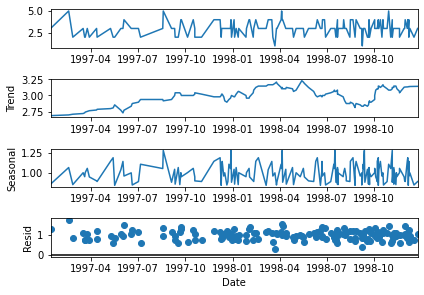

In [82]:
# Plot decomposition
fig = plt.figure()
s_per.plot()
plt.xlabel('Date')
fig.set_figheight(30)
fig.set_figwidth(8)
plt.show()

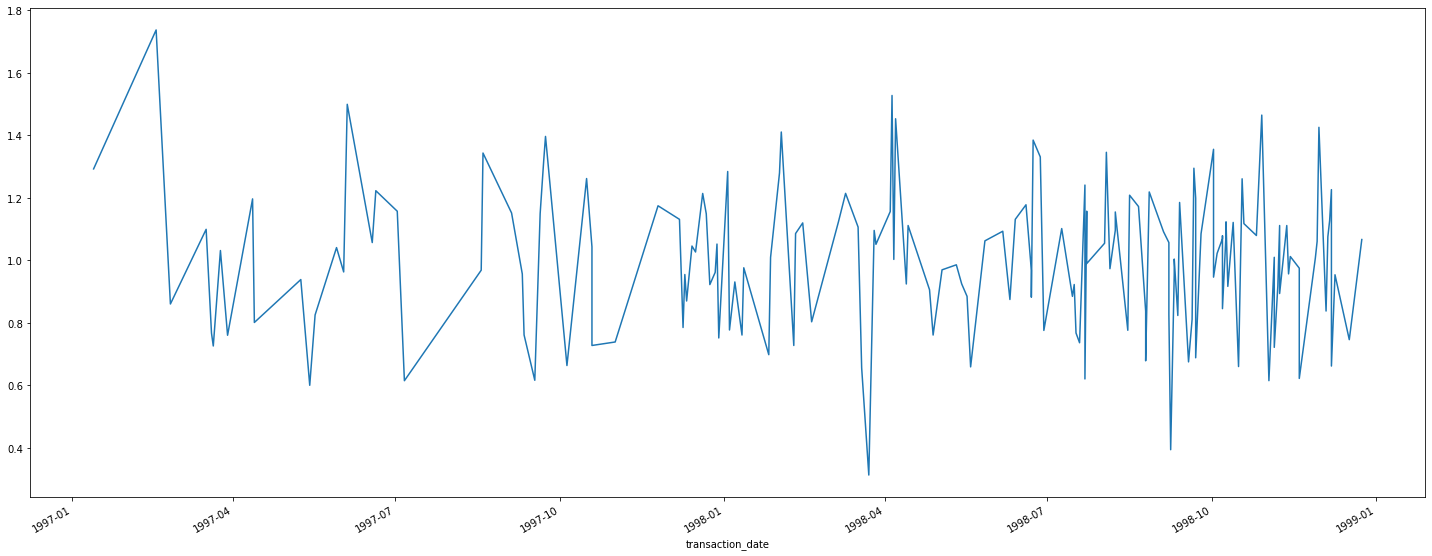

In [83]:
# Plot the residual alone
plt.figure(figsize=(25,10))
s_per.resid.plot()
plt.show()

#### Calculate the SD of the Error and the Factor of the Seasonality and add the Trend =1.1

In [84]:
print('the Standarad Deviation of the Demand data is', np.std(s_per.observed))
print('the Standarad Deviation of the Error of the decomposed data is', np.std(s_per.resid))
print('the Standarad Deviation of the Seasonal of the decomposed data is', np.std(s_per.seasonal))
print('the Standarad Deviation of the Trend of the decomposed data is', np.std(s_per.trend))
print('the  Combined Standarad Deviation of the decomposed data is', 
      np.std(s_per.resid)+np.std(s_per.seasonal)+np.std(s_per.trend))

the Standarad Deviation of the Demand data is 0.7634032014872285
the Standarad Deviation of the Error of the decomposed data is 0.22860392897428686
the Standarad Deviation of the Seasonal of the decomposed data is 0.11253271169424019
the Standarad Deviation of the Trend of the decomposed data is 0.12887441965845373
the  Combined Standarad Deviation of the decomposed data is 0.4700110603269808


In [85]:
# Calculate the combined SD of the three ( Error, Season, Trend), 
# Using this website: https://www.emathzone.com/tutorials/basic-statistics/combined-variance.html
n1_per=163
n2_per=163
n3_per=163
com_count_per=n1_per+n2_per+n3_per
print('The Combined Untis are',com_count_per)
x1_per= np.mean(s_per.seasonal)
print('The mean of the Seasonal is',x1_per)
x2_per=np.mean(s_per.resid)
print('The mean of the Residuals is',x2_per)
x3_per= np.mean(s_per.trend)
print('The mean of the Trend is',x3_per)
s1_per=np.std(s_per.seasonal)**2
print('The Variance of the Seasonal is',s1_per)
s2_per=np.std(s_per.resid)**2
print('The Variance of the Residuals is',s2_per)
s3_per=np.std(s_per.trend)**2
print('The Variance of the Trend is',s3_per)
com_mean_per=(n1_per*x1_per+n2_per*x2_per+n3_per*x3_per)/(n1_per+n2_per+n3_per)
print('The compound mean is',com_mean_per)
result1_per=n1_per*(s1_per+(x1_per-com_mean_per)**2)
print('The Deviation of the Seasonal is',result1_per)
result2_per=n2_per*(s2_per+(x2_per-com_mean_per)**2)
print('The Deviation of the Residual is',result2_per)
result3_per=n3_per*(s3_per+(x3_per-com_mean_per)**2)
print('The Deviation of the Trend is',result3_per)
new_sd_per= (result1_per+result2_per+result3_per)/com_count_per
print('The SD of after Calculating it Manually is',new_sd_per)

The Combined Untis are 489
The mean of the Seasonal is 0.9977352383767393
The mean of the Residuals is 1.000091963682264
The mean of the Trend is 3.0023289543878366
The Variance of the Seasonal is 0.012663611201258982
The Variance of the Residuals is 0.05225975634248079
The Variance of the Trend is 0.016608616042303244
The compound mean is 1.6667187188156132
The Deviation of the Seasonal is 75.01300885312301
The Deviation of the Residual is 80.95411088134215
The Deviation of the Trend is 293.47552073743776
The SD of after Calculating it Manually is 0.9191056042370203


In [86]:
# the Standard Deviation of the combined decomposed data is not equal to the SD of the Demand
print('The mean of the demand is',np.mean(df_per))
print('The highest demand of is',df_per.max())
Seas_per= df_per.max()/np.mean(df_per)
print('The Seasonal Fraction is',Seas_per)
# the trend(Growth rate is 1.1)
print('The new Standard Deviation is',np.std(s_per.resid)*Seas_per*1.1)
# The new Standard Deviation is less than the SD of the Demand , and the Combined Standard Deviations

The mean of the demand is quantity    2.993865
dtype: float64
The highest demand of is quantity    5
dtype: int64
The Seasonal Fraction is quantity    1.670082
dtype: float64
The new Standard Deviation is quantity    0.419966
dtype: float64


#### Get the Seasonal, Trend, Error Data for the Highest one

##### Seasonal

In [87]:
# The seasonal data
print(s_per.seasonal)

transaction_date
1997-01-13    0.863583
1997-02-17    1.066661
1997-02-25    0.857928
1997-03-17    1.003260
1997-03-20    0.954625
1997-03-21    1.004576
1997-03-25    1.056547
1997-03-29    0.951661
1997-04-12    0.903459
1997-04-13    0.895959
1997-05-09    1.142901
1997-05-14    1.186729
1997-05-17    0.848899
1997-05-29    1.040058
1997-06-02    1.141342
1997-06-04    0.962724
1997-06-18    1.001629
1997-06-20    0.853199
1997-07-02    0.895104
1997-07-06    1.106926
1997-08-18    1.054327
1997-08-19    1.275919
1997-09-04    0.886700
1997-09-10    1.045284
1997-09-11    0.863583
1997-09-17    1.066661
1997-09-20    0.857928
1997-09-22    1.003260
1997-09-23    0.954625
1997-10-05    1.004576
1997-10-16    1.056547
1997-10-19    0.951661
1997-10-19    0.903459
1997-11-01    0.895959
1997-11-25    1.142901
1997-12-07    1.186729
1997-12-09    0.848899
1997-12-10    1.040058
1997-12-11    1.141342
1997-12-14    0.962724
1997-12-16    1.001629
1997-12-20    0.853199
1997-12-22    0.8

In [88]:
# Convert the Seasonal data into Dataframe
s_per.seasonal
print(len(s_per.seasonal))
sea_per=pd.DataFrame(s_per.seasonal)
print(sea_per)

163
                  seasonal
transaction_date          
1997-01-13        0.863583
1997-02-17        1.066661
1997-02-25        0.857928
1997-03-17        1.003260
1997-03-20        0.954625
1997-03-21        1.004576
1997-03-25        1.056547
1997-03-29        0.951661
1997-04-12        0.903459
1997-04-13        0.895959
1997-05-09        1.142901
1997-05-14        1.186729
1997-05-17        0.848899
1997-05-29        1.040058
1997-06-02        1.141342
1997-06-04        0.962724
1997-06-18        1.001629
1997-06-20        0.853199
1997-07-02        0.895104
1997-07-06        1.106926
1997-08-18        1.054327
1997-08-19        1.275919
1997-09-04        0.886700
1997-09-10        1.045284
1997-09-11        0.863583
1997-09-17        1.066661
1997-09-20        0.857928
1997-09-22        1.003260
1997-09-23        0.954625
1997-10-05        1.004576
1997-10-16        1.056547
1997-10-19        0.951661
1997-10-19        0.903459
1997-11-01        0.895959
1997-11-25        1.1429

##### Residuals

In [89]:
# Convert the residual data into Dataframe
print(len(s_per.resid))
res_per=np.array(s_per.resid)
print(res_per)
res_per=pd.DataFrame(res_per,columns=['Error'])
print(res_per)

163
[1.29281635 1.73741159 0.86056803 1.09942908 0.76721581 0.72616451
 1.03156039 0.76048602 1.19686233 0.80143494 0.93872969 0.60036344
 0.82545691 1.04100641 0.9631091  1.49950493 1.05710125 1.22301796
 1.15737556 0.61508293 0.96865249 1.34356898 1.15177225 0.95667793
 0.76140218 0.61644136 1.14963226 1.31983503 1.39670959 0.66363002
 1.26197267 1.04354758 0.72779621 0.73895025 1.17478052 1.13139334
 0.78533053 0.95485415 0.87011926 1.04598333 1.02689836 1.21421927
 1.14910859 0.92262439 0.96183099 1.05230577 0.75185133 1.28449064
 0.77737566 0.93103902 0.76120776 0.97640857 0.69835479 1.00946538
 1.27974693 1.41085687 0.72779621 1.08595729 1.11995743 0.80358898
 1.12338672 1.21450748 1.10673063 0.65603341 0.31321518 1.09595116
 1.05147191 1.1563559  1.52774051 1.00319817 1.45324284 0.92457464
 1.11164719 0.90604468 0.76120776 0.96981122 0.98591265 0.92480055
 0.88501979 0.659322   1.06258247 1.09334475 0.87496674 1.13139334
 1.1779958  0.96820876 0.88228876 1.38495941 1.33116454 0.

In [90]:
# There is 24 not available data for the residuals
print(res_per.info())
print(type(res_per))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163 entries, 0 to 162
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Error   163 non-null    float64
dtypes: float64(1)
memory usage: 1.4 KB
None
<class 'pandas.core.frame.DataFrame'>


##### Trend

In [91]:
# Convert the Trend data into Dataframe
print(len(s_per.trend))
tre_per=np.array(s_per.trend)
print(tre_per)
tre_per=pd.DataFrame(tre_per,columns=['Trend'])
print(tre_per)

163
[2.68707729 2.69799215 2.708907   2.71982186 2.73073671 2.74165157
 2.75256643 2.76348128 2.77439614 2.78531099 2.79622585 2.8071407
 2.85416667 2.77083333 2.72916667 2.77083333 2.83333333 2.875
 2.89583333 2.9375     2.9375     2.91666667 2.9375     3.
 3.04166667 3.04166667 3.04166667 3.02083333 3.         3.
 3.         3.02083333 3.04166667 3.02083333 2.97916667 2.97916667
 3.         3.02083333 3.02083333 2.97916667 2.91666667 2.89583333
 2.91666667 2.9375     2.95833333 2.97916667 3.         2.97916667
 2.97916667 3.02083333 3.0625     3.0625     3.         2.95833333
 2.95833333 2.97916667 3.04166667 3.08333333 3.125      3.14583333
 3.14583333 3.16666667 3.16666667 3.16666667 3.1875     3.20833333
 3.1875     3.125      3.10416667 3.125      3.10416667 3.10416667
 3.125      3.10416667 3.0625     3.08333333 3.1875     3.22916667
 3.20833333 3.1875     3.125      3.0625     3.         2.97916667
 3.         2.97916667 2.97916667 3.         3.         3.02083333
 3.04166667 3

In [92]:
# There is 24 not available data for the residuals
print(tre_per.info())
print(type(tre_per))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163 entries, 0 to 162
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Trend   163 non-null    float64
dtypes: float64(1)
memory usage: 1.4 KB
None
<class 'pandas.core.frame.DataFrame'>


#### Combine all DataFrames and download it as CSV

In [93]:
csv_per= pd.concat([sea_per,df_per],axis=1)
print(csv_per)

                  seasonal  quantity
transaction_date                    
1997-01-13        0.863583         3
1997-02-17        1.066661         5
1997-02-25        0.857928         2
1997-03-17        1.003260         3
1997-03-20        0.954625         2
1997-03-21        1.004576         2
1997-03-25        1.056547         3
1997-03-29        0.951661         2
1997-04-12        0.903459         3
1997-04-13        0.895959         2
1997-05-09        1.142901         3
1997-05-14        1.186729         2
1997-05-17        0.848899         2
1997-05-29        1.040058         3
1997-06-02        1.141342         3
1997-06-04        0.962724         4
1997-06-18        1.001629         3
1997-06-20        0.853199         3
1997-07-02        0.895104         3
1997-07-06        1.106926         2
1997-08-18        1.054327         3
1997-08-19        1.275919         5
1997-09-04        0.886700         3
1997-09-10        1.045284         3
1997-09-11        0.863583         2
1

In [94]:
csv_per=csv_per.reset_index()
print(csv_per)
new_csv_per= pd.concat([csv_per,res_per,tre_per],axis=1)
print(new_csv_per.iloc[50:70,])

    transaction_date  seasonal  quantity
0         1997-01-13  0.863583         3
1         1997-02-17  1.066661         5
2         1997-02-25  0.857928         2
3         1997-03-17  1.003260         3
4         1997-03-20  0.954625         2
5         1997-03-21  1.004576         2
6         1997-03-25  1.056547         3
7         1997-03-29  0.951661         2
8         1997-04-12  0.903459         3
9         1997-04-13  0.895959         2
10        1997-05-09  1.142901         3
11        1997-05-14  1.186729         2
12        1997-05-17  0.848899         2
13        1997-05-29  1.040058         3
14        1997-06-02  1.141342         3
15        1997-06-04  0.962724         4
16        1997-06-18  1.001629         3
17        1997-06-20  0.853199         3
18        1997-07-02  0.895104         3
19        1997-07-06  1.106926         2
20        1997-08-18  1.054327         3
21        1997-08-19  1.275919         5
22        1997-09-04  0.886700         3
23        1997-0

In [129]:
new_csv_per['Added_Demand']= new_csv_per['seasonal']+new_csv_per['Error']+new_csv_per['Trend']
new_csv_per['Multiplied_Demand']= new_csv_per['seasonal']*new_csv_per['Error']*new_csv_per['Trend']

In [130]:
new_csv_per['quantity']=new_csv_per['quantity'].astype('str')
new_csv_per['Multiplied_Demand']= new_csv_per['Multiplied_Demand'].astype('str')
pd.set_option('display.max_rows', None)
print(new_csv_per[['quantity','Multiplied_Demand']])

    quantity   Multiplied_Demand
0        3.0                 3.0
1        5.0   5.000000000000001
2        2.0  1.9999999999999998
3        3.0                 3.0
4        2.0                 2.0
5        2.0                 2.0
6        3.0  2.9999999999999996
7        2.0                 2.0
8        3.0                 3.0
9        2.0                 2.0
10       3.0  3.0000000000000004
11       2.0  2.0000000000000004
12       2.0                 2.0
13       3.0                 3.0
14       3.0  2.9999999999999996
15       4.0                 4.0
16       3.0                 3.0
17       3.0                 3.0
18       3.0                 3.0
19       2.0                 2.0
20       3.0  2.9999999999999996
21       5.0                 5.0
22       3.0  2.9999999999999996
23       3.0                 3.0
24       2.0                 2.0
25       2.0  1.9999999999999998
26       3.0                 3.0
27       4.0   4.000000000000001
28       4.0                 4.0
29       2

In [98]:
# Save the Data into CSV
new_csv_per.to_csv(r'/csv_25_product.csv')

### 75% product

In [99]:
s_ver=sm.tsa.seasonal_decompose(df_ver,freq=24, model='multiplicative',extrapolate_trend='freq')

<ipython-input-99-e687d2a2ecc8>:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  s_ver=sm.tsa.seasonal_decompose(df_ver,freq=24, model='multiplicative',extrapolate_trend='freq')


<Figure size 576x2160 with 0 Axes>

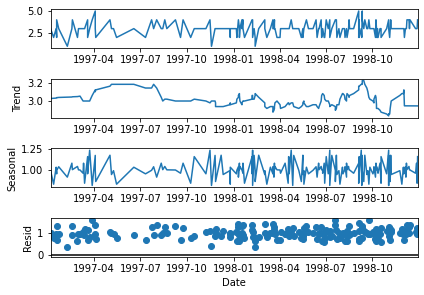

In [100]:
# Plot decomposition
fig = plt.figure()
s_ver.plot()
plt.xlabel('Date')
fig.set_figheight(30)
fig.set_figwidth(8)
plt.show()

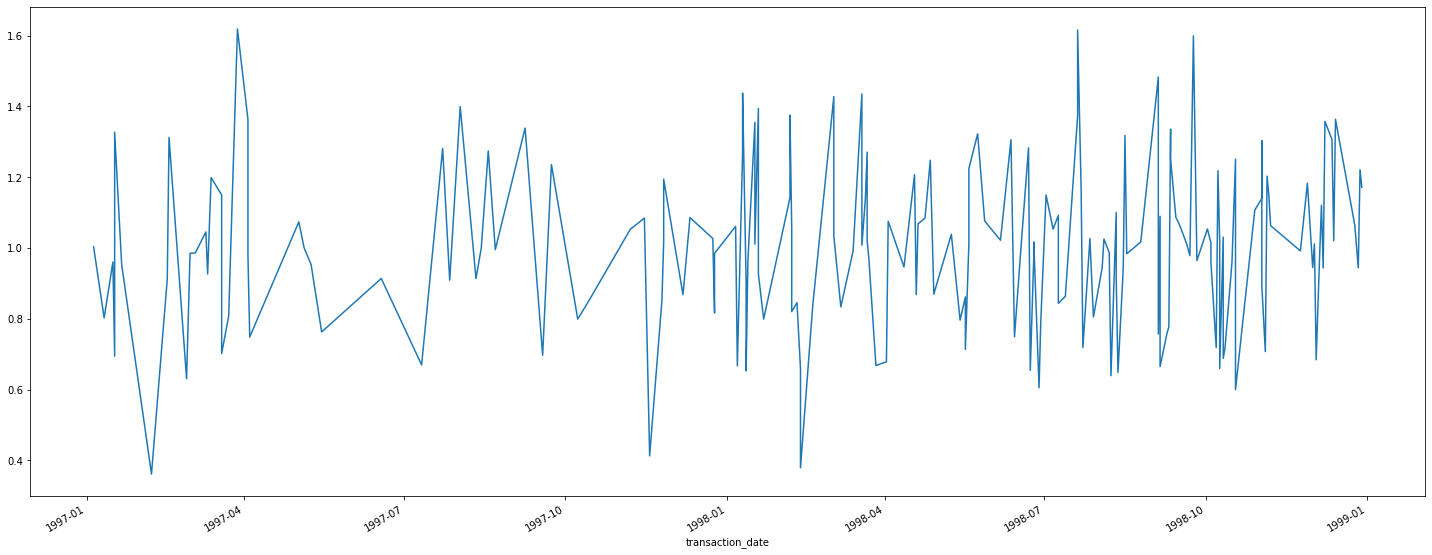

In [101]:
# Plot the residual alone
plt.figure(figsize=(25,10))
s_ver.resid.plot()
plt.show()

#### Calculate the SD of the Error and the Factor of the Seasonality and add the Trend =1.1

In [102]:
print('the Standarad Deviation of the Demand data is', np.std(s_ver.observed))
print('the Standarad Deviation of the Error of the decomposed data is', np.std(s_ver.resid))
print('the Standarad Deviation of the Seasonal of the decomposed data is', np.std(s_ver.seasonal))
print('the Standarad Deviation of the Trend of the decomposed data is', np.std(s_ver.trend))
print('the  Combined Standarad Deviation of the decomposed data is', 
      np.std(s_ver.resid)+np.std(s_ver.seasonal)+np.std(s_ver.trend))

the Standarad Deviation of the Demand data is 0.7552392615290928
the Standarad Deviation of the Error of the decomposed data is 0.2331951246158381
the Standarad Deviation of the Seasonal of the decomposed data is 0.10908343493952173
the Standarad Deviation of the Trend of the decomposed data is 0.08246242323430085
the  Combined Standarad Deviation of the decomposed data is 0.4247409827896607


In [103]:
# Calculate the combined SD of the three ( Error, Season, Trend), 
# Using this website: https://www.emathzone.com/tutorials/basic-statistics/combined-variance.html
n1_ver=184
n2_ver=184
n3_ver=184
com_count_ver=n1_ver+n2_ver+n3_ver
print('The Combined Untis are',com_count_ver)
x1_ver= np.mean(s_ver.seasonal)
print('The mean of the Seasonal is',x1_ver)
x2_ver=np.mean(s_ver.resid)
print('The mean of the Residuals is',x2_ver)
x3_ver= np.mean(s_ver.trend)
print('The mean of the Trend is',x3_ver)
s1_ver=np.std(s_ver.seasonal)**2
print('The Variance of the Seasonal is',s1_ver)
s2_ver=np.std(s_ver.resid)**2
print('The Variance of the Residuals is',s2_ver)
s3_ver=np.std(s_ver.trend)**2
print('The Variance of the Trend is',s3_ver)
com_mean_ver=(n1_ver*x1_ver+n2_ver*x2_ver+n3_ver*x3_ver)/(n1_ver+n2_ver+n3_ver)
print('The compound mean is',com_mean_ver)
result1_ver=n1_ver*(s1_ver+(x1_ver-com_mean_ver)**2)
print('The Deviation of the Seasonal is',result1_ver)
result2_ver=n2_ver*(s2_ver+(x2_ver-com_mean_ver)**2)
print('The Deviation of the Residual is',result2_ver)
result3_ver=n3_ver*(s3_ver+(x3_ver-com_mean_ver)**2)
print('The Deviation of the Trend is',result3_ver)
new_sd_ver= (result1_ver+result2_ver+result3_ver)/com_count_ver
print('The SD of after Calculating it Manually is',new_sd_ver)

The Combined Untis are 552
The mean of the Seasonal is 0.9992841037338654
The mean of the Residuals is 1.0033559563419938
The mean of the Trend is 3.009787039224953
The Variance of the Seasonal is 0.01189919577820487
The Variance of the Residuals is 0.05437996614459626
The Variance of the Trend is 0.006800051245672961
The compound mean is 1.6708090331002707
The Deviation of the Seasonal is 85.16346648313193
The Deviation of the Residual is 91.97673795063832
The Deviation of the Trend is 331.1378359921596
The SD of after Calculating it Manually is 0.9207935514962496


In [104]:
# the Standard Deviation of the combined decomposed data is not equal to the SD of the Demand
print('The mean of the demand is',np.mean(df_ver))
print('The highest demand of is',df_ver.max())
Seas_ver= df_high.max()/np.mean(df_ver)
print('The Seasonal Fraction is',Seas_ver)
# the trend(Growth rate is 1.1)
print('The new Standard Deviation is',np.std(s_ver.resid)*Seas_ver*1.1)
# The new Standard Deviation is less than the SD of the Demand , and the Combined Standard Deviations

The mean of the demand is quantity    3.016304
dtype: float64
The highest demand of is quantity    5
dtype: int64
The Seasonal Fraction is quantity    1.657658
dtype: float64
The new Standard Deviation is quantity    0.425213
dtype: float64


#### Get the Seasonal, Trend, Error Data for the Highest one

##### Seasonal

In [105]:
# The seasonal data
print(s_ver.seasonal)

transaction_date
1997-01-05    0.987611
1997-01-11    0.822436
1997-01-16    1.029850
1997-01-17    0.949017
1997-01-17    0.992407
1997-01-21    1.035547
1997-02-07    0.908775
1997-02-16    1.079414
1997-02-17    1.000252
1997-02-27    1.039452
1997-03-01    0.997897
1997-03-04    0.996008
1997-03-10    0.956640
1997-03-11    1.079159
1997-03-13    0.834211
1997-03-19    1.159599
1997-03-19    0.949606
1997-03-23    1.238201
1997-03-28    0.806994
1997-04-03    1.174371
1997-04-03    0.990421
1997-04-04    0.855038
1997-05-02    1.176518
1997-05-05    0.940577
1997-05-09    0.987611
1997-05-15    0.822436
1997-06-18    1.029850
1997-07-11    0.949017
1997-07-23    0.992407
1997-07-27    1.035547
1997-08-02    0.908775
1997-08-11    1.079414
1997-08-14    1.000252
1997-08-18    1.039452
1997-08-22    0.997897
1997-09-08    0.996008
1997-09-18    0.956640
1997-09-23    1.079159
1997-10-08    0.834211
1997-10-15    1.159599
1997-11-07    0.949606
1997-11-15    1.238201
1997-11-18    0.8

In [106]:
# Convert the Seasonal data into Dataframe
s_ver.seasonal
print(len(s_ver.seasonal))
sea_ver=pd.DataFrame(s_ver.seasonal)
print(sea_ver)

184
                  seasonal
transaction_date          
1997-01-05        0.987611
1997-01-11        0.822436
1997-01-16        1.029850
1997-01-17        0.949017
1997-01-17        0.992407
1997-01-21        1.035547
1997-02-07        0.908775
1997-02-16        1.079414
1997-02-17        1.000252
1997-02-27        1.039452
1997-03-01        0.997897
1997-03-04        0.996008
1997-03-10        0.956640
1997-03-11        1.079159
1997-03-13        0.834211
1997-03-19        1.159599
1997-03-19        0.949606
1997-03-23        1.238201
1997-03-28        0.806994
1997-04-03        1.174371
1997-04-03        0.990421
1997-04-04        0.855038
1997-05-02        1.176518
1997-05-05        0.940577
1997-05-09        0.987611
1997-05-15        0.822436
1997-06-18        1.029850
1997-07-11        0.949017
1997-07-23        0.992407
1997-07-27        1.035547
1997-08-02        0.908775
1997-08-11        1.079414
1997-08-14        1.000252
1997-08-18        1.039452
1997-08-22        0.9978

##### Residuals

In [107]:
# Convert the residual data into Dataframe
print(len(s_ver.resid))
res_ver=np.array(s_ver.resid)
print(res_ver)
res_ver=pd.DataFrame(res_ver,columns=['Error'])
print(res_ver)

184
[1.00317405 0.80245554 0.9604891  0.69431006 1.32684586 0.95291722
 0.36165993 0.91273283 1.31224519 0.63087642 0.98493746 0.98602093
 1.0453251  0.92664761 1.19873791 1.14982311 0.7020458  0.80762364
 1.61850357 1.36243114 0.97579051 0.74850495 1.07364105 1.00063688
 0.95298304 0.76291805 0.91389669 0.66991558 1.28125122 0.90886929
 1.39916122 0.91373762 0.99974798 1.27388105 0.99519636 1.3386769
 0.6968834  1.23553015 0.7991586  0.85641997 1.0530687  1.08436181
 0.4130556  0.85151947 1.01673277 1.19442279 0.86805021 1.08579747
 1.02680567 0.81626897 0.9846915  1.06109006 0.66713425 1.26992695
 1.43723363 0.90138981 0.65289664 0.96204559 1.35496218 1.01102871
 1.3937668  0.92664761 0.7991586  1.1418933  1.37543667 1.05485536
 0.82041388 0.84564692 0.65937772 0.37930994 0.83832246 1.42748198
 1.03408798 0.83376045 0.99167513 1.43485464 1.04389712 1.00765943
 1.13996409 1.2705304  1.02101922 0.96877318 0.66807163 0.67876575
 1.07519153 0.94636352 1.20712069 0.86839787 1.06790066 1.0

In [108]:
# There is 24 not available data for the residuals
print(res_ver.info())
print(type(res_ver))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Error   184 non-null    float64
dtypes: float64(1)
memory usage: 1.6 KB
None
<class 'pandas.core.frame.DataFrame'>


##### Trend

In [109]:
# Convert the Trend data into Dataframe
print(len(s_ver.trend))
tre_ver=np.array(s_ver.trend)
print(tre_ver)
tre_ver=pd.DataFrame(tre_ver,columns=['Trend'])
print(tre_ver)

184
[3.02802234 3.03044988 3.03287742 3.03530495 3.03773249 3.04016002
 3.04258756 3.0450151  3.04744263 3.04987017 3.05229771 3.05472524
 3.         3.         3.         3.         3.         3.
 3.0625     3.125      3.10416667 3.125      3.16666667 3.1875
 3.1875     3.1875     3.1875     3.14583333 3.14583333 3.1875
 3.14583333 3.04166667 3.         3.02083333 3.02083333 3.
 3.         3.         3.         3.02083333 3.         2.97916667
 3.         3.         2.97916667 2.9375     2.9375     2.9375
 2.95833333 2.97916667 2.95833333 2.97916667 3.02083333 3.04166667
 3.0625     3.08333333 3.0625     3.         2.95833333 2.97916667
 3.         3.         3.         3.02083333 3.0625     3.0625
 3.02083333 3.02083333 3.0625     3.08333333 3.04166667 2.97916667
 2.9375     2.91666667 2.9375     2.9375     2.89583333 2.875
 2.89583333 2.91666667 2.9375     2.97916667 3.         2.95833333
 2.91666667 2.9375     2.97916667 2.97916667 2.95833333 2.97916667
 2.97916667 2.9375     2.916

In [110]:
# There is 24 not available data for the residuals
print(tre_ver.info())
print(type(tre_ver))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Trend   184 non-null    float64
dtypes: float64(1)
memory usage: 1.6 KB
None
<class 'pandas.core.frame.DataFrame'>


#### Combine all DataFrames and download it as CSV

In [111]:
csv_ver= pd.concat([sea_ver,df_ver],axis=1)
print(csv_ver)

                  seasonal  quantity
transaction_date                    
1997-01-05        0.987611         3
1997-01-11        0.822436         2
1997-01-16        1.029850         3
1997-01-17        0.949017         2
1997-01-17        0.992407         4
1997-01-21        1.035547         3
1997-02-07        0.908775         1
1997-02-16        1.079414         3
1997-02-17        1.000252         4
1997-02-27        1.039452         2
1997-03-01        0.997897         3
1997-03-04        0.996008         3
1997-03-10        0.956640         3
1997-03-11        1.079159         3
1997-03-13        0.834211         3
1997-03-19        1.159599         4
1997-03-19        0.949606         2
1997-03-23        1.238201         3
1997-03-28        0.806994         4
1997-04-03        1.174371         5
1997-04-03        0.990421         3
1997-04-04        0.855038         2
1997-05-02        1.176518         4
1997-05-05        0.940577         3
1997-05-09        0.987611         3
1

In [112]:
csv_ver=csv_ver.reset_index()
print(csv_ver)
new_csv_ver= pd.concat([csv_ver,res_ver,tre_ver],axis=1)
print(new_csv_ver.iloc[50:70,])

    transaction_date  seasonal  quantity
0         1997-01-05  0.987611         3
1         1997-01-11  0.822436         2
2         1997-01-16  1.029850         3
3         1997-01-17  0.949017         2
4         1997-01-17  0.992407         4
5         1997-01-21  1.035547         3
6         1997-02-07  0.908775         1
7         1997-02-16  1.079414         3
8         1997-02-17  1.000252         4
9         1997-02-27  1.039452         2
10        1997-03-01  0.997897         3
11        1997-03-04  0.996008         3
12        1997-03-10  0.956640         3
13        1997-03-11  1.079159         3
14        1997-03-13  0.834211         3
15        1997-03-19  1.159599         4
16        1997-03-19  0.949606         2
17        1997-03-23  1.238201         3
18        1997-03-28  0.806994         4
19        1997-04-03  1.174371         5
20        1997-04-03  0.990421         3
21        1997-04-04  0.855038         2
22        1997-05-02  1.176518         4
23        1997-0

In [131]:
new_csv_ver['Added_Demand']= new_csv_ver['seasonal']+new_csv_ver['Error']+new_csv_ver['Trend']
new_csv_ver['Multiplied_Demand']= new_csv_ver['seasonal']*new_csv_ver['Error']*new_csv_ver['Trend']

In [132]:
new_csv_ver['quantity']=new_csv_ver['quantity'].astype('str')
new_csv_ver['Multiplied_Demand']= new_csv_ver['Multiplied_Demand'].astype('str')
pd.set_option('display.max_rows', None)
print(new_csv_ver[['quantity','Multiplied_Demand']])

    quantity   Multiplied_Demand
0        3.0  2.9999999999999996
1        2.0  2.0000000000000004
2        3.0                 3.0
3        2.0  1.9999999999999998
4        4.0                 4.0
5        3.0  3.0000000000000004
6        1.0                 1.0
7        3.0  2.9999999999999996
8        4.0  3.9999999999999996
9        2.0  1.9999999999999998
10       3.0                 3.0
11       3.0                 3.0
12       3.0                 3.0
13       3.0                 3.0
14       3.0  3.0000000000000004
15       4.0                 4.0
16       2.0  1.9999999999999998
17       3.0  2.9999999999999996
18       4.0  3.9999999999999996
19       5.0                 5.0
20       3.0                 3.0
21       2.0                 2.0
22       4.0                 4.0
23       3.0                 3.0
24       3.0                 3.0
25       2.0                 2.0
26       3.0                 3.0
27       2.0  1.9999999999999996
28       4.0                 4.0
29       3

In [116]:
# Save the Data into CSV
new_csv_ver.to_csv(r'/csv_75_product.csv')